### We are going to discuss MinMaxScaler and RobustScaler 

In [69]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [70]:
df=pd.read_csv('wine_data.csv',header=None,usecols=[0,1,2])
df.columns=['Class Label','Alcohol','Malic acid']

In [71]:
df

,Class Label,Alcohol,Malic acid
0,1,14.23,1.71
1,1,13.20,1.78
2,1,13.16,2.36
3,1,14.37,1.95
4,1,13.24,2.59
...,...,...,...
173,3,13.71,5.65
174,3,13.40,3.91
175,3,13.27,4.28
176,3,13.17,2.59


In [72]:
from sklearn.model_selection import train_test_split

In [73]:
X_train,X_test,y_train,y_test=train_test_split(df.drop('Class Label',axis=1),df['Class Label'],test_size=0.3,random_state=0)

X_train.shape,X_test.shape

((124, 2), (54, 2))

In [74]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

scaler.fit(X_train)

X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [75]:
X_train_scaled=pd.DataFrame(X_train_scaled,columns=X_train.columns)
X_test_scaled=pd.DataFrame(X_test_scaled,columns=X_test.columns)

In [76]:
np.round(X_train_scaled.describe(),1)

,Alcohol,Malic acid
count,124.0,124.0
mean,0.5,0.3
std,0.2,0.2
min,0.0,0.0
25%,0.4,0.2
50%,0.5,0.2
75%,0.7,0.5
max,1.0,1.0


### Visualization of Normalization
#### 1. It scales the features of a dataset to a specific range, typically between 0 and 1.
#### 2. The main advantage of the MinMax Scaler is that it preserves the shape of the original distribution while bringing the values within a desired range.
#### 3. However, it has some limitations, such as sensitivity to outliers and the potential for information loss

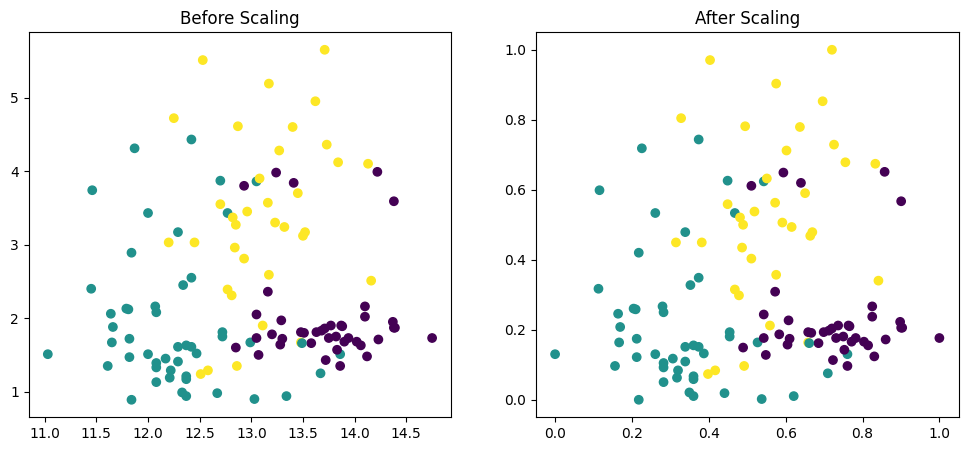

In [89]:
fig, (ax1,ax2)=plt.subplots(ncols=2,figsize=(12,5))

ax1.set_title("Before Scaling")
ax1.scatter(X_train['Alcohol'],X_train['Malic acid'],c=y_train)

ax2.set_title("After Scaling")
ax2.scatter(X_train_scaled['Alcohol'],X_train_scaled['Malic acid'],c=y_train)
plt.show()

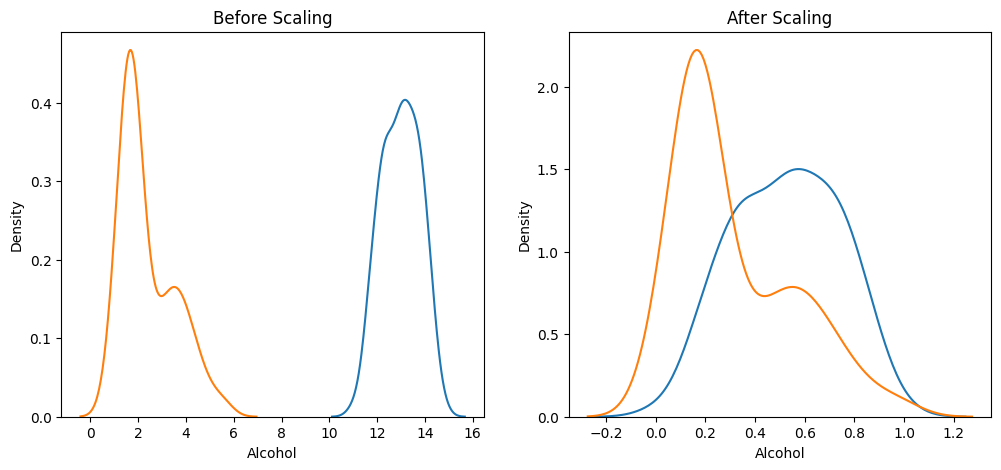

In [88]:
fig, (ax1,ax2)=plt.subplots(ncols=2,figsize=(12,5))

ax1.set_title("Before Scaling")
sns.kdeplot(X_train['Alcohol'],ax=ax1)
sns.kdeplot(X_train['Malic acid'],ax=ax1)

ax2.set_title("After Scaling")
sns.kdeplot(X_train_scaled['Alcohol'],ax=ax2)
sns.kdeplot(X_train_scaled['Malic acid'],ax=ax2)

plt.show()

### Accuracy of Min Max Scaler

In [79]:
from sklearn.linear_model import LogisticRegression

lr=LogisticRegression()
lr_scaled=LogisticRegression()

In [80]:
lr.fit(X_train,y_train)
lr_scaled.fit(X_train_scaled,y_train)

LogisticRegression()

In [81]:
y_pred=lr.predict(X_test)
y_pred_scaled=lr_scaled.predict(X_test_scaled)

In [82]:
from sklearn.metrics import accuracy_score

#### We can see here Unscaled data has less accuracy than Normalized Data

In [83]:
print('Unscaled Data',accuracy_score(y_test,y_pred))
print('Normalized Data',accuracy_score(y_test,y_pred_scaled))

Unscaled Data 0.7592592592592593
Normalized Data 0.7962962962962963


### Robust Scaler
#### RobustScaler is a median-based scaling method, so it is not affected by outliers. 
#### Since it uses the interquartile range, it absorbs the effects of outliers while scaling.

Formula of Robust Scaler

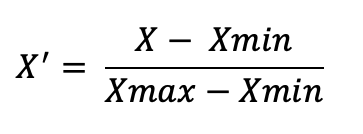

In [2]:
from IPython.display import Image
Image(filename='formula.png')